In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
data = pd.read_csv("CarPrice_Assignment.csv", index_col=0)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [339]:
num_Cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg']

cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
            'cylindernumber', 'fuelsystem']

In [340]:
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} unique values")


fueltype: 2 unique values
aspiration: 2 unique values
doornumber: 2 unique values
carbody: 5 unique values
drivewheel: 3 unique values
enginelocation: 2 unique values
enginetype: 7 unique values
cylindernumber: 7 unique values
fuelsystem: 8 unique values


In [341]:
low_variance_cols = [col for col in cat_cols if data[col].value_counts(normalize=True).iloc[0] > 0.95]
print("Low variance categorical columns:", low_variance_cols)

Low variance categorical columns: ['enginelocation']


In [342]:
data = data.drop(columns=low_variance_cols)
data = data.drop(columns=['CarName', 'symboling'])
data

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [343]:
existing_cols = [item for item in cat_cols if item not in low_variance_cols]
data = pd.get_dummies(data, columns=existing_cols, drop_first=True)  # One-hot encode

correlations = data.drop(columns=num_Cols).corr()['price'].abs().sort_values(ascending=False)
low_correlation_cats = correlations[correlations < 0.5].index.tolist()

print("Categorical columns with low correlation to price:", low_correlation_cats)

Categorical columns with low correlation to price: ['cylindernumber_six', 'enginetype_ohcv', 'enginetype_ohc', 'carbody_hatchback', 'cylindernumber_five', 'carbody_hardtop', 'cylindernumber_twelve', 'aspiration_turbo', 'enginetype_dohcv', 'carbody_sedan', 'fueltype_gas', 'fuelsystem_idi', 'cylindernumber_three', 'fuelsystem_spdi', 'carbody_wagon', 'enginetype_l', 'doornumber_two', 'fuelsystem_spfi', 'fuelsystem_4bbl', 'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_two', 'fuelsystem_mfi']


In [344]:
data = data.drop(low_correlation_cats, axis=1)
data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
car_ID,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,False,True,True,False,True
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,False,True,True,False,True
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,True,False,False,True
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,True,False,True,False,True
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,False,True,True,False,True
202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,False,True,True,False,True
203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,False,True,False,False,True


In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wheelbase            205 non-null    float64
 1   carlength            205 non-null    float64
 2   carwidth             205 non-null    float64
 3   carheight            205 non-null    float64
 4   curbweight           205 non-null    int64  
 5   enginesize           205 non-null    int64  
 6   boreratio            205 non-null    float64
 7   stroke               205 non-null    float64
 8   compressionratio     205 non-null    float64
 9   horsepower           205 non-null    int64  
 10  peakrpm              205 non-null    int64  
 11  citympg              205 non-null    int64  
 12  highwaympg           205 non-null    int64  
 13  price                205 non-null    float64
 14  drivewheel_fwd       205 non-null    bool   
 15  drivewheel_rwd       205 non-null    bool   


In [346]:
# train_data = data

train_data = data[0:190]
test_data = data[190:]

In [347]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 1 to 190
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wheelbase            190 non-null    float64
 1   carlength            190 non-null    float64
 2   carwidth             190 non-null    float64
 3   carheight            190 non-null    float64
 4   curbweight           190 non-null    int64  
 5   enginesize           190 non-null    int64  
 6   boreratio            190 non-null    float64
 7   stroke               190 non-null    float64
 8   compressionratio     190 non-null    float64
 9   horsepower           190 non-null    int64  
 10  peakrpm              190 non-null    int64  
 11  citympg              190 non-null    int64  
 12  highwaympg           190 non-null    int64  
 13  price                190 non-null    float64
 14  drivewheel_fwd       190 non-null    bool   
 15  drivewheel_rwd       190 non-null    bool   


# Visualization

In [348]:
train_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
car_ID,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,False,True,True,False,True
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,False,True,True,False,True
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,True,False,False,True
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,True,False,True,False,True
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,False,True


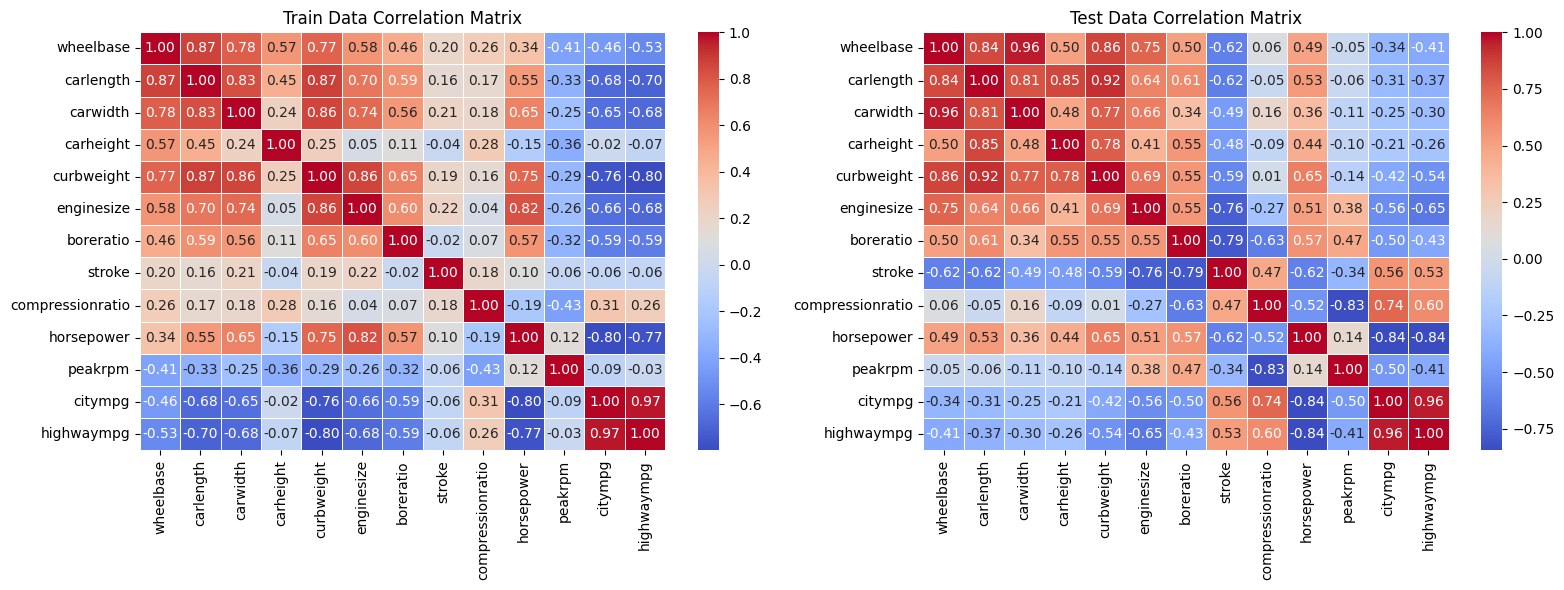

In [349]:
train_corr = train_data[num_Cols].corr()
test_corr = test_data[num_Cols].corr()

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Train Data Heatmap
sns.heatmap(train_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Train Data Correlation Matrix")

# Test Data Heatmap
sns.heatmap(test_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Test Data Correlation Matrix")

# Adjust layout
plt.tight_layout()
plt.show()

In [350]:
def preprocess(X):
    X = X.drop(['carlength', 'carwidth', 'curbweight', 'citympg', 'enginesize', 'boreratio', 'horsepower'], axis=1)
    return X

In [351]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [352]:
print(data.isna().nunique())

wheelbase              1
carlength              1
carwidth               1
carheight              1
curbweight             1
enginesize             1
boreratio              1
stroke                 1
compressionratio       1
horsepower             1
peakrpm                1
citympg                1
highwaympg             1
price                  1
drivewheel_fwd         1
drivewheel_rwd         1
cylindernumber_four    1
fuelsystem_2bbl        1
fuelsystem_mpfi        1
dtype: int64


In [353]:
train_data

,wheelbase,carheight,stroke,compressionratio,peakrpm,highwaympg,price,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
car_ID,,,,,,,,,,,,
1,88.6,48.8,2.68,9.0,5000,27,13495.0,False,True,True,False,True
2,88.6,48.8,2.68,9.0,5000,27,16500.0,False,True,True,False,True
3,94.5,52.4,3.47,9.0,5000,26,16500.0,False,True,False,False,True
4,99.8,54.3,3.40,10.0,5500,30,13950.0,True,False,True,False,True
5,99.4,54.3,3.40,8.0,5500,22,17450.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
186,97.3,55.7,3.40,9.0,5250,34,8195.0,True,False,True,False,True
187,97.3,55.7,3.40,9.0,5250,34,8495.0,True,False,True,False,True
188,97.3,55.7,3.40,23.0,4500,42,9495.0,True,False,True,False,False


# Training of the Model

In [354]:
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price'].values

X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price'].values

The following normalizes the inputs of the model between 0 and 1

In [355]:
def zscore_normalize(X, mu=None, sigma=None):
    if mu is None:
        mu = np.mean(X, axis=0)
    if sigma is None:
        sigma = np.std(X, axis=0)
    X_norm = (X - mu) / (sigma + 1e-8)
    return X_norm, mu, sigma



In [356]:
# Normalize training data
X_train, mu, sigma = zscore_normalize(X_train)

In [357]:
# Normalize test data using training parameters
X_test, _, _ = zscore_normalize(X_test, mu, sigma)

In [358]:
print(X_test.shape)
print(X_train.shape)

(15, 11)
(190, 11)


This code initializes values for a linear regression model

In [359]:
#seed helps in generating the same random values each time ensuring reproducibility in code
np.random.seed(42)   
weights = np.random.rand(X_train.shape[1]) # assigning weights to every input helps you find how much each input contributes to the ouptut
bias = 0.0 # gets updated during the training
learning_rate = 0.01 # determines how much weights change during training
num_iterations = 170 #specifies the number of iterations
reg_lambda= 500
m = len(y_train) # stores the number of training examples. Training example is a single data point from the training dataset which is used to teach the model 

Gradient Descent code to train the linear regression model

In [360]:
# Gradient Descent with Loss Tracking
loss_history = []

for i in range(num_iterations): # runs for a pre-defined "num_iterations" times
    y_pred = np.dot(X_train, weights) + bias # calculates the predicted output for each training example
    error = y_pred - y_train # calculates the difference between the predicted values and the actual target

    mse_loss = np.mean(error ** 2)
    loss_history.append(mse_loss)
    
    weights_gradient = (2/m) * np.dot(X_train.T, error) +  (reg_lambda / m) * weights  # gradient tells us the direction and magnitude to adjust each weight to reduce the error.
    bias_gradient = (2/m) * np.sum(error) # tells how much to change the bais to improve predictions

    weights -= learning_rate * weights_gradient 
    bias -= learning_rate * bias_gradient   

    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {mse_loss}, Weights Gradient = {np.linalg.norm(weights_gradient)}, Bias Gradient = {bias_gradient}")

y_train_pred = np.dot(X_train, weights) + bias
y_test_pred = np.dot(X_test, weights) + bias

Iteration 0: Loss = 235984824.00529626, Weights Gradient = 26510.33003979534, Bias Gradient = -26038.11228421053
Iteration 10: Loss = 145972224.8121174, Weights Gradient = 8853.061745452864, Bias Gradient = -21275.033490113005
Iteration 20: Loss = 101937098.4058301, Weights Gradient = 3192.968258217627, Bias Gradient = -17383.251330393196
Iteration 30: Loss = 75066027.5736126, Weights Gradient = 1397.5465687446042, Bias Gradient = -14203.381957356056
Iteration 40: Loss = 57665325.45361429, Weights Gradient = 779.5182766337022, Bias Gradient = -11605.197163192852
Iteration 50: Loss = 46193947.97772498, Weights Gradient = 498.82940122366267, Bias Gradient = -9482.291020613378
Iteration 60: Loss = 38579591.27760196, Weights Gradient = 334.16049614466766, Bias Gradient = -7747.722139937152
Iteration 70: Loss = 33509919.43084533, Weights Gradient = 226.89357917913281, Bias Gradient = -6330.453075863243
Iteration 80: Loss = 30129536.24348941, Weights Gradient = 154.8679829009596, Bias Gradie

In [361]:
print("Actual prices:", y_test[:10])
print("Predicted prices:", y_test_pred[:10])

Actual prices: [ 9980. 13295. 13845. 12290. 12940. 13415. 15985. 16515. 18420. 18950.]
Predicted prices: [11328.73184153 16890.93146446 10329.01407538 12006.58557595
 16499.37840305 16514.27393346 16499.37840305 16514.27393346
 17481.97627979 17496.8718102 ]


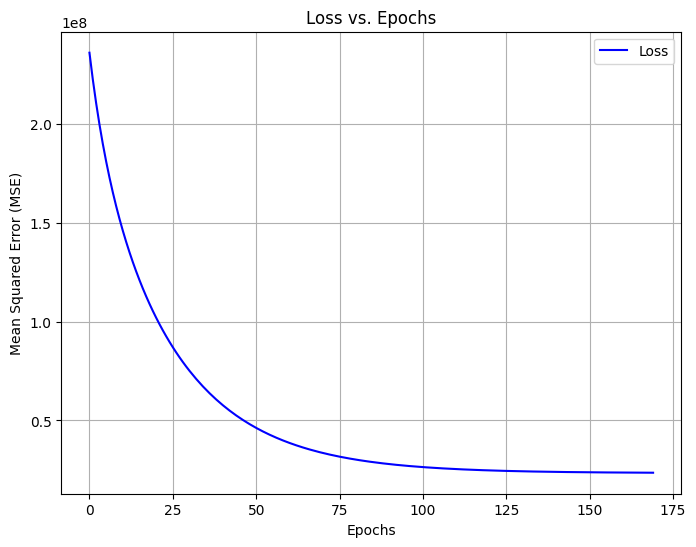

In [362]:
# Plotting the Loss vs. Epochs
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, color="b", label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

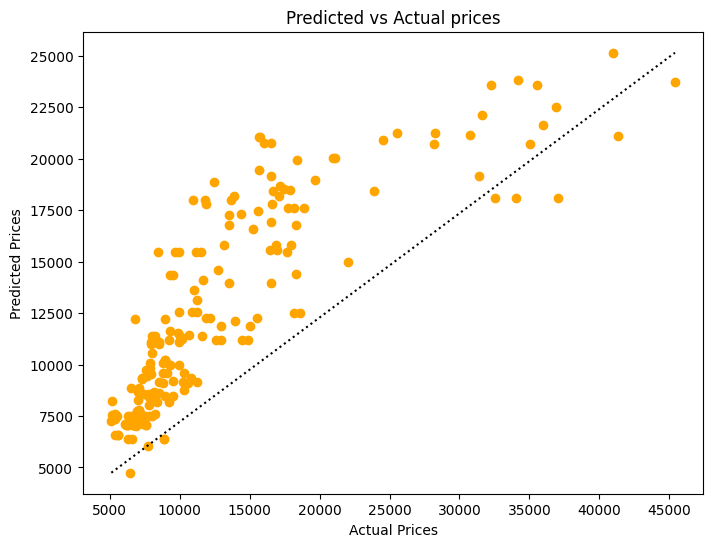

In [363]:
plt.figure(figsize=(8, 6))

# Scatter plot of the actual price vs the pedicted price
plt.scatter(y_train, y_train_pred, color = 'orange')

# Line plot of the best-fit line (model predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], 'k:')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual prices')
plt.show()

In [364]:
total_train = np.sum((y_train - y_train.mean()) ** 2)
residual_train = np.sum((y_train - y_train_pred) ** 2)
r2_train = 1-(residual_train / total_train)

residual_test = np.sum((y_test - y_test_pred) ** 2)
total_test = np.sum((y_test - y_test.mean()) ** 2)
r2_test = 1-(residual_test / total_test)

In [365]:
print("R-squared (R²) for Train set: ", r2_train)
print("R-squared (R²) for Test set: ", r2_test)

R-squared (R²) for Train set:  0.646239140082807
R-squared (R²) for Test set:  0.6182563817941826
